# Principal component analysis 
PCA (Principal component analysis) Is a powerful tool often used in dimensionality reduction.

We will today use PCA to reduce the dimensionality of the Iris dataset from 4d to 2d.

In [2]:
import numpy as np
import sklearn as sk
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# try to import pandas
# if it doesnt exist pip install it 
# if this fails delete it and manuall install pandas(pip install pandas)
try:
    import pandas as pd
except ImportError as e:
    !pip install pandas
    import pandas as pd

%matplotlib inline

# plot data and fit (2d only)
def plot_fit(X, y, clf):
    """
    X = samples
    y = Ground truth
    clf = trained model
    """
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    fig = plt.figure(1, figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors= "black")
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

In [3]:
# import some data to play with
iris = sk.datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
display(iris_df)
X = StandardScaler().fit_transform(iris_df)
target = iris.target
print ("Number of data points ::", X.shape[0])
print("Number of features ::", X.shape[1])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Number of data points :: 150
Number of features :: 4


## Dimensionality reduction.
To use PCA in practice, simply use the following

```{Python}
pca = PCA(n_components = n )
principalComponents = pca.fit_transform(data_to_transform)

```

In [4]:
# n_components are how many components we want to keep.
pca = PCA(n_components = 2 ) # We only need two first principle components (2D space)
principalComponents = pca.fit_transform(X)
principalComponents.shape

(150, 2)

Plot the principal components and compare them to X

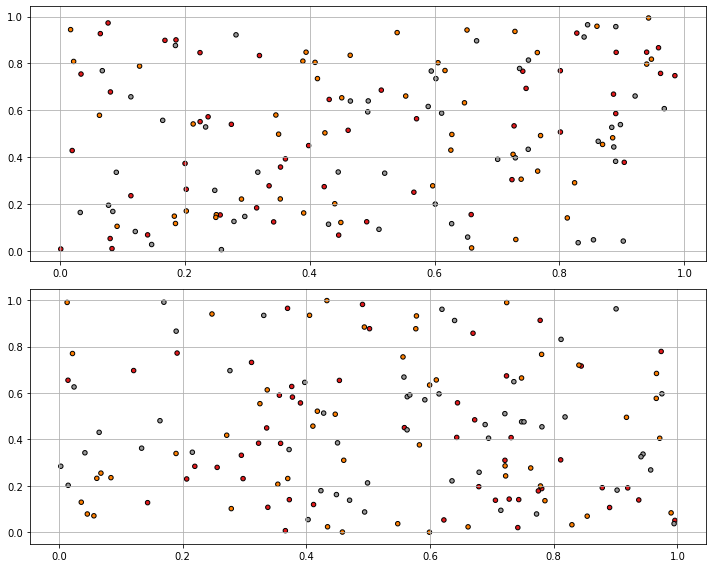

In [5]:
###
# code here
# replace x, y and x1, y1 with the values from your computed pca and your X
###
fig = plt.figure(1, figsize=(10, 8))
ax = plt.subplot(211)
#Plot scaled version
x, y = np.random.rand(2, 150)
g = plt.scatter(x, y, c = target, cmap = plt.cm.Set1, edgecolor = 'black', s = 20)
plt.grid()
plt.subplot(212)

# Plot principal components
x1, y1 = np.random.rand(2, 150)
plt.scatter(x1, y1, c = target,cmap = plt.cm.Set1, edgecolor = 'black', s = 20)
plt.grid()
plt.tight_layout()
plt.show()

## Explained Variance
The explained variance tells you how much information (variance) can be attributed to each of the principal components. 

By using the attribute explained_variance_ratio_, you can see that the first principal component contains 72.77% of the variance and the second principal component contains 23.03% of the variance.

In [6]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.72962445 0.22850762]
0.9581320720000164


So in total our pca has now expressed 96% of the variance of the dataset.
We can use these new components to attempt to fit a svm like before that should with lower dimensional data retain most of the performance from using the total dataset.

## Exercises
### 1) SVM
Apply a SVM to the principal components. How does it perform compared to using only 2 datapoints pr sample?

Training score: 0.9133333333333333


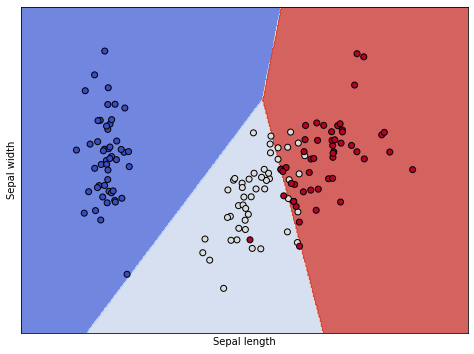

In [7]:
SVM = sk.svm.LinearSVC(penalty='l2',
                loss='squared_hinge',
                random_state=42,
                max_iter=10e4)

SVM.fit(principalComponents, target)

print("Training score:", SVM.score(principalComponents, target))
plot_fit(principalComponents, target, SVM)

## 2) 3 Princepal components
Attempt with 3 principal components. 
How much of the variance of the data does that express? 

Again make a 3d plot where each point is colored respective to the predicted class from your svm.

**Better score** of 95%, over 91% with only two principole components.

In [8]:
pca = PCA(n_components = 3 ) # We only need two first principle components (2D space)
principalComponents = pca.fit_transform(X)
principalComponents.shape
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

# Now represent 99- of variance in dataset with these 3 PCAs
SVM = sk.svm.LinearSVC(penalty='l2',
                loss='squared_hinge',
                random_state=42,
                max_iter=10e4)

SVM.fit(principalComponents, target)

print("Training score:", SVM.score(principalComponents, target))

[0.72962445 0.22850762 0.03668922]
0.9948212908928451
Training score: 0.9466666666666667


## 3) Best accuracy
Compare all the different svm's we have run. What is the best accuracy you can achieve. You are also allowed to use different kernels

In [9]:
# Parameters
C = 1.0                     
gamma = "scale" #Default    
degree = 3                  

# 1 
svc_classifier = sk.svm.SVC(kernel='linear', C=C).fit(principalComponents, target)
# 2
rbf_svc_classifier = sk.svm.SVC(kernel='rbf', gamma=gamma, C=C).fit(principalComponents, target)
# 3
poly_svc_classifier = sk.svm.SVC(kernel='poly', degree=degree, C=C).fit(principalComponents, target)

print("svc_classifier score:", svc_classifier.score(principalComponents, target))
print("rbf_svc_classifier score:", rbf_svc_classifier.score(principalComponents, target))
print("poly_svc_classifier score:", poly_svc_classifier.score(principalComponents, target))

svc_classifier score: 0.96
rbf_svc_classifier score: 0.9733333333333334
poly_svc_classifier score: 0.9466666666666667


## 4) Grid search
Attempt with the grid search function built in to **sklearn**
The gridsearch function will try a lot of different parameters for your SVM so you don't have to.
```{Python}
from sklearn.model_selection import GridSearchCV
import numpy as np
    
c = np.logspace(start = -15, stop = 1000, base = 1.02)
param_grid = {'C': c}

grid = GridSearchCV(clf, param_grid = param_grid, cv = 3, n_jobs = -1, scoring = 'accuracy')
grid.fit(X_train, y_train)
```
[documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)


Are you able to get a better fit?

In [10]:
pca = PCA(n_components = 3 ) # We only need two first principle components (2D space)
principalComponents = pca.fit_transform(X)
print(principalComponents.shape)

c = np.logspace(start = -15, stop = 1000, base = 1.02)
param_grid = {'C': c, "kernel" : ['linear', 'rbf', 'poly'], "gamma" : ["scale", "auto"]}

grid = sk.model_selection.GridSearchCV(sk.svm.SVC(), param_grid = param_grid, cv = 3, n_jobs = -1, scoring = 'accuracy')
grid.fit(principalComponents, target)
print(grid.score(principalComponents, target))

(150, 3)
